In [59]:
import pandas as pd

import numpy as np

from sklearn.decomposition import NMF

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("spotify.xls", index_col=[0])

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5000)

In [6]:
# To get all the values

x = df.values

In [7]:
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [8]:
# Factorization

nmf = NMF(n_components=100, max_iter=1000,random_state=50) 

In [9]:
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=50)

In [10]:
user_matrix = nmf.transform(x)

In [11]:
user_matrix

array([[1.15762457, 0.        , 0.        , ..., 0.        , 0.        ,
        1.19289024],
       [2.15175355, 0.        , 3.02484875, ..., 0.        , 4.72164841,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.92663012,
        0.05457933],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.31790201,
        0.        ],
       [0.        , 0.        , 2.92879508, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.50434188, 0.        ,
        0.        ]])

In [12]:
# Take transpose to match the no of columnn in user_matrix

song_matrix = nmf.components_.T

In [13]:
song_matrix

array([[0.17468526, 0.33682578, 0.11831245, ..., 0.14672262, 0.32851361,
        0.15260884],
       [0.31424847, 0.32919525, 0.        , ..., 0.        , 0.02844465,
        0.04049641],
       [0.50853688, 0.09016305, 0.08708608, ..., 0.304934  , 0.07204982,
        0.27537152],
       ...,
       [0.06633002, 0.43598028, 0.06783713, ..., 0.        , 0.19265497,
        0.        ],
       [0.24957261, 0.2738205 , 0.        , ..., 0.3193151 , 0.32786067,
        0.16503575],
       [0.16577926, 0.        , 0.09417878, ..., 0.00515891, 0.63703076,
        0.36413374]])

In [14]:
# 1000 users , songs of 100 different genres which the users listen to
user_matrix.shape

(1000, 100)

In [15]:
# 5000 songs , 100 genres
song_matrix.shape

(5000, 100)

In [16]:
# Steps for building a Recommendation System
# 1) Consider recommending songs to user_1 who is located at row location 0.
# 2) Find the Euclidean Distance between user_1 and the remaining 999 users.
# 3) Find out top n songs heard by the 5 closest users
# 4) Recommend those n songs to user_1.

In [17]:
# Calculating the distance between two users

def calculate_dist(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2) for x in range(len(u1))]) ,0.5)

In [18]:
calculate_dist(user_matrix[0],user_matrix[1])

15.605481309262657

In [19]:
# Calculating distance between the base user(user_1) and the other 999 users to find the nearest neighbours

def distance_from_user(base_user , user_matrix):
    
    distance = []
    for i in range(len(user_matrix)):
        if base_user != i:
            distance.append(calculate_dist(user_matrix[base_user],user_matrix[i]))
            
        else : 
            pass
        
    return distance

In [20]:
dist = distance_from_user(0,user_matrix)

In [21]:
dist

[15.605481309262657,
 14.081486047946003,
 15.015570512113959,
 15.28549891372592,
 14.293848278484589,
 13.587040038047528,
 13.330885370345804,
 15.622229622676794,
 15.6469306797051,
 16.260330579651935,
 16.54861142924835,
 15.268455983190039,
 12.156106367896559,
 14.591400045983436,
 12.381944579274908,
 14.649601635586142,
 15.213680330097912,
 14.673165608676252,
 13.534188674520603,
 13.410629457589316,
 14.659693092431677,
 15.09519768398333,
 14.878528223407994,
 15.143225452571373,
 12.910489198390536,
 16.644695325674633,
 14.684037028029113,
 13.213109755582439,
 14.84829763759527,
 15.737226233377559,
 14.381093617495381,
 14.119602005310746,
 15.173809731759269,
 15.420932709005493,
 16.68926062530985,
 15.481146900627081,
 16.98550193008722,
 14.456790935438455,
 15.140990472390556,
 12.702958983316492,
 15.87245999198568,
 15.534742883876978,
 15.168836968458553,
 13.739569284325393,
 14.684408048572777,
 14.280418739661263,
 13.185105071896432,
 14.114539537737825,
 

In [22]:
# argsort--> to sort the data , displays position of the song

user_index = np.argsort(dist)[0:5]
user_index

array([441, 214, 551, 626, 260], dtype=int64)

In [30]:
temp = pd.DataFrame(df.iloc[user_index])[0:5]

In [31]:
temp

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_442,8,0,15,3,13,9,5,8,2,5,...,15,3,0,9,14,1,7,0,5,13
user_215,12,8,8,1,9,14,2,3,2,13,...,5,4,6,13,5,14,4,5,10,8
user_552,2,7,4,6,9,2,11,8,13,7,...,15,12,12,14,2,15,11,13,12,13
user_627,6,8,13,10,8,1,8,8,14,7,...,14,9,1,9,1,14,1,14,2,3
user_261,8,4,6,2,1,4,3,8,8,6,...,6,8,6,4,5,4,7,9,1,4


In [33]:
for i in user_index:
    
    print("Songs heard by user" ,i+1)
    temp = pd.DataFrame(df.iloc[i])
    print(temp[temp.values != 0].index)

Songs heard by user 442
Index(['song_1', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4994',
       'song_4995', 'song_4996', 'song_4997', 'song_4999', 'song_5000'],
      dtype='object', length=4680)
Songs heard by user 215
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4693)
Songs heard by user 552
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4694)
Songs hea

In [34]:
# To recommend top 10 songs heard by these 5 closest users

def recommending_topsongs_heardByUsers(user_index,df):
    
    temp_df = df.iloc[user_index]
    dict1 = temp_df.max().to_dict()        # To sort in descending order and convert temp_df to dictionary
    sorted_dict = sorted(dict1.items(),key = lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse=True)[0:10]    # To sort the dictionary dict1
     
    return [x[0] for x in sorted_dict]
    

In [36]:
recommending_topsongs_heardByUsers(user_index,df)

['song_996',
 'song_995',
 'song_993',
 'song_989',
 'song_984',
 'song_983',
 'song_981',
 'song_980',
 'song_972',
 'song_969']

In [37]:
# Recommendation System Type 2

In [39]:
wcss = {}
for k in range(1,50):
    k_means = KMeans(n_clusters=k,max_iter=100).fit(song_matrix)
    wcss[k] = k_means.inertia_

Text(0, 0.5, 'Mean Squared Error')

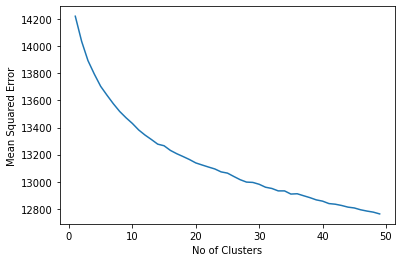

In [42]:
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel("No of Clusters")
plt.ylabel("Mean Squared Error")

In [67]:
def recommend_songs_onBasis_of_cluster(df,no_of_clusters,song_matrix,song_name,n_recommendations):
    
    
    k_means = KMeans(n_clusters = no_of_clusters,max_iter= 1000).fit(song_matrix)
    index_of_song = df.columns.to_list().index(song_name)
    song_vector = song_matrix[index_of_song]
    all_other_songs = list(k_means.predict(song_matrix))
    songs_in_the_selected_cluster = [x for x in range(len(all_other_songs)) if all_other_songs[x] == k_means.predict([song_vector])]
    song_cluster = song_matrix[songs_in_the_selected_cluster]
    
    nn = NearestNeighbors(n_neighbors = n_recommendations)
    nn.fit(song_cluster)
    recommended_songs = nn.kneighbors([song_matrix[index_of_song]])
    
    col_list = list(df.columns)
    
    
    return [col_list[x] for x in  recommended_songs[1][0]]

In [68]:
recommend_songs_onBasis_of_cluster(df,11,song_matrix,"song_2",n_recommendations=5)

['song_1', 'song_78', 'song_234', 'song_135', 'song_136']